In [1]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc

%cd ..
from src import bingo, evolution_simulator
import time
os.getcwd()

/home/mounim/Projects/BiNGO-3C/notebooks


'/home/mounim/Projects/BiNGO-3C/notebooks'

In [2]:
Benchmarking = []

In [3]:
ref1 = open("./data/Benchmarking/dataset/ref1.fasta").read()
ref2 = open("./data/Benchmarking/dataset/ref2.fasta").read()
len(ref1)

29732

In [4]:
Benchmarking = []

In [5]:
L = 100
while L < len(ref1) and L < len(ref2):
    L =int(L)
    S1 = ref1[0:L]
    S2 = ref2[0:L]
    print("\n"*10+str(L))
    print("*"*10+str(L))
    print("\n"*10+str(L))
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    print('S11G5:')
    size, gap, d = 11,5,5
    start = time.time()
    delim = bingo.random_delimiter(d) #select delimiter
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)
    end = time.time()
    print(end - start)
    Benchmarking.append(['BiNGO-3C Gap=5 (Recommended)', L, end - start])


    print('S11G1:')
    size, gap, d = 11,1,5
    start = time.time()
    delim = bingo.random_delimiter(d) #select delimiter
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)
    end = time.time()
    print(end - start)
    Benchmarking.append(['BiNGO-3C Gap=1 (Kmers)', L, end - start])


    print('S11G10:')
    size, gap, d = 11,10,5
    start = time.time()
    delim = bingo.random_delimiter(d) #select delimiter
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    dictSeqs = bingo.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = bingo.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make words
    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)
    end = time.time()
    print(end - start)
    Benchmarking.append(['BiNGO-3C Gap=10 (big gap)', L, end - start])



    f12 = open('./data/Benchmarking/dataset/S12.fasta','w')
    f12.write('>S1\n')
    f12.write(S1.replace('\n',''))
    f12.write(S1.replace('\s',''))
    f12.write(S1.replace('\t',''))
    f12.write(S1.replace(' ',''))
    f12.write('\n>S2\n')
    f12.write(S2.replace('\n',''))
    f12.write(S2.replace('\s',''))
    f12.write(S2.replace('\t',''))
    f12.write(S2.replace(' ',''))
    f12.write(S2)

    print('MAFFT:')
    start = time.time()
    # os.system("mafft --auto "+ sequences_filename + ' > outfile')  
    os.system("mafft /data/Benchmarking/dataset/S12.fasta > MAFFT_out 2>> log 1>>log")  
    end = time.time()
    Benchmarking.append(['MAFFT ', L, end - start])
    print(end - start)


    end = time.time()
    print('MASH:')
    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S1.fasta" )  
    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S2.fasta" )  
    os.system("mash dist  "+ "./data/Benchmarking/dataset/S1.fasta.msh ./data/Benchmarking/dataset/S2.fasta.msh  2>> log 1>>log" )  
    print(end - start)
    Benchmarking.append(['MASH ', L, end - start])


    print('clustalw:')
    if L<50000:
        start = time.time()
        os.system("clustalw ./data/Benchmarking/dataset/S12.fasta > outfile 2>> log 1>>log")  
        end = time.time()
        print(end - start)
        Benchmarking.append(['CLUSTAL-W ', L, end - start])


    print('FSWM:')
    start = time.time()
    os.system("./src/FSWM-master/fswm ./data/Benchmarking/dataset/S12.fasta" )  
    end = time.time()
    Benchmarking.append(['FSWM ', L, end - start])

    print('ANDI:')
    os.system("./src/FSWM-master/fswm ./data/Benchmarking/dataset/S12.fasta" )  
    end = time.time()
    print(end - start)
    Benchmarking.append([' ANDI ', L, end - start])
    
    benchmark = pd.DataFrame(Benchmarking)


    benchmark.columns = ['Method','Sequence_length','Processing_time']

    benchmark.to_csv('./benchmark.csv')

    L = L + 100











100
**********100










100
S11G5:
0.017287015914916992
S11G1:
0.07659649848937988
S11G10:
0.008443832397460938
MAFFT:
0.034163713455200195
MASH:
0.03422880172729492
clustalw:
0.0015232563018798828
FSWM:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0 sequences read
ANDI:


there must be at least 2 sequences


0 sequences read
0.4358084201812744










200
**********200










200
S11G5:
0.019611597061157227
S11G1:
0.08127284049987793
S11G10:
0.01025247573852539
MAFFT:
0.03851652145385742
MASH:
0.038573265075683594
clustalw:
0.012838363647460938
FSWM:


there must be at least 2 sequences
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2 sequences read
start sorting
ANDI:


each sequence must be longer than 1000 base pairs


2 sequences read
start sorting
0.45610809326171875










300
**********300










300
S11G5:
0.01565718650817871
S11G1:
0.07544589042663574
S11G10:
0.008027076721191406
MAFFT:
0.03724527359008789
MASH:
0.03729248046875
clustalw:
0.04675769805908203
FSWM:


each sequence must be longer than 1000 base pairs
each sequence must be longer than 1000 base pairs
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2 sequences read
start sorting
ANDI:


each sequence must be longer than 1000 base pairs


2 sequences read
start sorting
0.41347479820251465










400
**********400










400
S11G5:
0.016219615936279297
S11G1:
0.07587456703186035
S11G10:
0.01065516471862793
MAFFT:
0.03170442581176758
MASH:
0.03174400329589844
clustalw:


each sequence must be longer than 1000 base pairs
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.09202051162719727
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4220743179321289










500
**********500










500
S11G5:
0.015292644500732422
S11G1:
0.07559442520141602
S11G10:
0.012891292572021484
MAFFT:
0.028918027877807617
MASH:
0.028974056243896484
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.15662503242492676
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4191889762878418










600
**********600










600
S11G5:
0.015827655792236328
S11G1:
0.07059311866760254
S11G10:
0.008161783218383789
MAFFT:
0.035146474838256836
MASH:
0.03522086143493652
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.24813318252563477
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4137098789215088










700
**********700










700
S11G5:
0.01674175262451172
S11G1:
0.07155632972717285
S11G10:
0.00955653190612793
MAFFT:
0.035791873931884766
MASH:
0.03584170341491699
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.3573646545410156
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45204687118530273










800
**********800










800
S11G5:
0.016274213790893555
S11G1:
0.08226895332336426
S11G10:
0.02408623695373535
MAFFT:
0.043540000915527344
MASH:
0.043689727783203125
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.48343539237976074
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4127633571624756










900
**********900










900
S11G5:
0.016080379486083984
S11G1:
0.07417440414428711
S11G10:
0.009972810745239258
MAFFT:
0.03134298324584961
MASH:
0.031404733657836914
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.6122310161590576
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4144916534423828










1000
**********1000










1000
S11G5:
0.01572251319885254
S11G1:
0.07740283012390137
S11G10:
0.008932113647460938
MAFFT:
0.034166812896728516
MASH:
0.03423905372619629
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.808204174041748
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.41526031494140625










1100
**********1100










1100
S11G5:
0.01701068878173828
S11G1:
0.07426953315734863
S11G10:
0.009481191635131836
MAFFT:
0.03210258483886719
MASH:
0.03214907646179199
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.6928415298461914
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42209672927856445










1200
**********1200










1200
S11G5:
0.01627063751220703
S11G1:
0.07688760757446289
S11G10:
0.009769439697265625
MAFFT:
0.02980351448059082
MASH:
0.02984023094177246
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.5286965370178223
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.41985559463500977










1300
**********1300










1300
S11G5:
0.01576852798461914
S11G1:
0.07615256309509277
S11G10:
0.009427309036254883
MAFFT:
0.033592939376831055
MASH:
0.03363323211669922
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


1.334211826324463
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43234801292419434










1400
**********1400










1400
S11G5:
0.0157928466796875
S11G1:
0.07525873184204102
S11G10:
0.009649515151977539
MAFFT:
0.03568840026855469
MASH:
0.03572511672973633
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.37587523460388184
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4204082489013672










1500
**********1500










1500
S11G5:
0.015610456466674805
S11G1:
0.0780179500579834
S11G10:
0.009433507919311523
MAFFT:
0.030887603759765625
MASH:
0.03095841407775879
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


1.776787281036377
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42162370681762695










1600
**********1600










1600
S11G5:
0.016439437866210938
S11G1:
0.07645869255065918
S11G10:
0.008501529693603516
MAFFT:
0.033068180084228516
MASH:
0.033141136169433594
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2.020502805709839
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42630863189697266










1700
**********1700










1700
S11G5:
0.016209125518798828
S11G1:
0.07599163055419922
S11G10:
0.009452581405639648
MAFFT:
0.03347897529602051
MASH:
0.03351926803588867
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2.280902862548828
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.41885972023010254










1800
**********1800










1800
S11G5:
0.01632237434387207
S11G1:
0.07782101631164551
S11G10:
0.0092620849609375
MAFFT:
0.034828901290893555
MASH:
0.034885406494140625
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2.6127817630767822
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42535972595214844










1900
**********1900










1900
S11G5:
0.01691150665283203
S11G1:
0.07544589042663574
S11G10:
0.010124921798706055
MAFFT:
0.03319954872131348
MASH:
0.03330636024475098
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


2.8310563564300537
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4232769012451172










2000
**********2000










2000
S11G5:
0.01754927635192871
S11G1:
0.07731819152832031
S11G10:
0.01045370101928711
MAFFT:
0.03583931922912598
MASH:
0.035880088806152344
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


3.109659433364868
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42365288734436035










2100
**********2100










2100
S11G5:
0.01673126220703125
S11G1:
0.07616496086120605
S11G10:
0.009429931640625
MAFFT:
0.03518319129943848
MASH:
0.03523421287536621
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


1.6236145496368408
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42118263244628906










2200
**********2200










2200
S11G5:
0.01610422134399414
S11G1:
0.08538579940795898
S11G10:
0.009833574295043945
MAFFT:
0.03275561332702637
MASH:
0.03281855583190918
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


3.826728105545044
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4232618808746338










2300
**********2300










2300
S11G5:
0.016526222229003906
S11G1:
0.07770872116088867
S11G10:
0.009894132614135742
MAFFT:
0.03159022331237793
MASH:
0.03162813186645508
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


4.095288991928101
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43355512619018555










2400
**********2400










2400
S11G5:
0.01729559898376465
S11G1:
0.07855105400085449
S11G10:
0.010837316513061523
MAFFT:
0.03476667404174805
MASH:
0.03480982780456543
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


4.552034139633179
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43087244033813477










2500
**********2500










2500
S11G5:
0.01612257957458496
S11G1:
0.08043670654296875
S11G10:
0.009198427200317383
MAFFT:
0.031173229217529297
MASH:
0.03120899200439453
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


4.848536252975464
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42264723777770996










2600
**********2600










2600
S11G5:
0.01891803741455078
S11G1:
0.08379769325256348
S11G10:
0.0101470947265625
MAFFT:
0.03453469276428223
MASH:
0.03459644317626953
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


5.194217920303345
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4203035831451416










2700
**********2700










2700
S11G5:
0.015441656112670898
S11G1:
0.08000564575195312
S11G10:
0.010035276412963867
MAFFT:
0.035568952560424805
MASH:
0.035672903060913086
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


5.494430303573608
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42830944061279297










2800
**********2800










2800
S11G5:
0.018158912658691406
S11G1:
0.08046150207519531
S11G10:
0.010940790176391602
MAFFT:
0.030510425567626953
MASH:
0.030573129653930664
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


6.229960918426514
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4302384853363037










2900
**********2900










2900
S11G5:
0.016716480255126953
S11G1:
0.0794379711151123
S11G10:
0.009594202041625977
MAFFT:
0.028621673583984375
MASH:
0.028659820556640625
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


6.633570671081543
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4164273738861084










3000
**********3000










3000
S11G5:
0.018601655960083008
S11G1:
0.0867300033569336
S11G10:
0.010150671005249023
MAFFT:
0.03440976142883301
MASH:
0.03446555137634277
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


7.024106025695801
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42192625999450684










3100
**********3100










3100
S11G5:
0.01721811294555664
S11G1:
0.08091115951538086
S11G10:
0.010863065719604492
MAFFT:
0.03730177879333496
MASH:
0.037340641021728516
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


7.460024118423462
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4256720542907715










3200
**********3200










3200
S11G5:
0.01675271987915039
S11G1:
0.07862472534179688
S11G10:
0.0090789794921875
MAFFT:
0.03416728973388672
MASH:
0.03422045707702637
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


7.9025914669036865
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4242713451385498










3300
**********3300










3300
S11G5:
0.01632833480834961
S11G1:
0.08196258544921875
S11G10:
0.009701967239379883
MAFFT:
0.03650355339050293
MASH:
0.03659677505493164
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


8.78567624092102
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43089818954467773










3400
**********3400










3400
S11G5:
0.01726531982421875
S11G1:
0.08022403717041016
S11G10:
0.011837482452392578
MAFFT:
0.033986806869506836
MASH:
0.03403806686401367
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


9.125605821609497
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42563819885253906










3500
**********3500










3500
S11G5:
0.016872882843017578
S11G1:
0.08205771446228027
S11G10:
0.010097265243530273
MAFFT:
0.030649900436401367
MASH:
0.030690670013427734
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


9.939639568328857
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4301753044128418










3600
**********3600










3600
S11G5:
0.017485618591308594
S11G1:
0.08005070686340332
S11G10:
0.01089334487915039
MAFFT:
0.03138089179992676
MASH:
0.03143191337585449
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


10.098601341247559
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42667603492736816










3700
**********3700










3700
S11G5:
0.01630687713623047
S11G1:
0.08337092399597168
S11G10:
0.00920414924621582
MAFFT:
0.035886526107788086
MASH:
0.03593158721923828
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


10.969283103942871
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.41913795471191406










3800
**********3800










3800
S11G5:
0.016324520111083984
S11G1:
0.08420848846435547
S11G10:
0.009334802627563477
MAFFT:
0.03226590156555176
MASH:
0.032303571701049805
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


11.242848873138428
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4253690242767334










3900
**********3900










3900
S11G5:
0.019966840744018555
S11G1:
0.08875679969787598
S11G10:
0.009536266326904297
MAFFT:
0.03013443946838379
MASH:
0.030199050903320312
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


11.751323699951172
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.41524219512939453










4000
**********4000










4000
S11G5:
0.017422914505004883
S11G1:
0.08441400527954102
S11G10:
0.009881734848022461
MAFFT:
0.031140565872192383
MASH:
0.031187772750854492
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


12.53524899482727
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43131256103515625










4100
**********4100










4100
S11G5:
0.01761150360107422
S11G1:
0.0821540355682373
S11G10:
0.011070489883422852
MAFFT:
0.03631782531738281
MASH:
0.036366939544677734
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


12.870336294174194
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42630648612976074










4200
**********4200










4200
S11G5:
0.016725778579711914
S11G1:
0.08260250091552734
S11G10:
0.009069681167602539
MAFFT:
0.03830099105834961
MASH:
0.038346052169799805
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


13.703906774520874
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4309983253479004










4300
**********4300










4300
S11G5:
0.020914077758789062
S11G1:
0.0832509994506836
S11G10:
0.009432077407836914
MAFFT:
0.031287193298339844
MASH:
0.03132963180541992
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


14.420737504959106
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42493462562561035










4400
**********4400










4400
S11G5:
0.017712831497192383
S11G1:
0.08283591270446777
S11G10:
0.009196281433105469
MAFFT:
0.04342079162597656
MASH:
0.043492794036865234
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


15.06436562538147
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42365384101867676










4500
**********4500










4500
S11G5:
0.016895771026611328
S11G1:
0.08345556259155273
S11G10:
0.009332418441772461
MAFFT:
0.037276268005371094
MASH:
0.03733062744140625
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


16.02613377571106
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42360472679138184










4600
**********4600










4600
S11G5:
0.01685619354248047
S11G1:
0.08187556266784668
S11G10:
0.011716842651367188
MAFFT:
0.030768871307373047
MASH:
0.0308225154876709
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


16.312367916107178
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43120312690734863










4700
**********4700










4700
S11G5:
0.017842769622802734
S11G1:
0.08128142356872559
S11G10:
0.011806964874267578
MAFFT:
0.03340339660644531
MASH:
0.03346419334411621
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


16.999462604522705
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42889928817749023










4800
**********4800










4800
S11G5:
0.017821550369262695
S11G1:
0.08354377746582031
S11G10:
0.011250972747802734
MAFFT:
0.03262686729431152
MASH:
0.03267788887023926
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


18.018290996551514
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4316670894622803










4900
**********4900










4900
S11G5:
0.017138004302978516
S11G1:
0.08323311805725098
S11G10:
0.010230541229248047
MAFFT:
0.037047386169433594
MASH:
0.03710031509399414
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


19.039991855621338
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42843198776245117










5000
**********5000










5000
S11G5:
0.017110109329223633
S11G1:
0.08511900901794434
S11G10:
0.010818004608154297
MAFFT:
0.04296398162841797
MASH:
0.04304146766662598
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


19.71126079559326
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4695596694946289










5100
**********5100










5100
S11G5:
0.019090652465820312
S11G1:
0.08643889427185059
S11G10:
0.009557247161865234
MAFFT:
0.03254437446594238
MASH:
0.03259396553039551
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


20.545185089111328
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4280269145965576










5200
**********5200










5200
S11G5:
0.017571687698364258
S11G1:
0.08696460723876953
S11G10:
0.00942373275756836
MAFFT:
0.03841376304626465
MASH:
0.03846240043640137
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


21.313504457473755
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43030667304992676










5300
**********5300










5300
S11G5:
0.01723790168762207
S11G1:
0.08037710189819336
S11G10:
0.010277032852172852
MAFFT:
0.03249835968017578
MASH:
0.03256058692932129
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


22.160922288894653
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43645739555358887










5400
**********5400










5400
S11G5:
0.01768207550048828
S11G1:
0.0849454402923584
S11G10:
0.010771751403808594
MAFFT:
0.035105228424072266
MASH:
0.03514862060546875
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


23.34101915359497
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43375658988952637










5500
**********5500










5500
S11G5:
0.017660856246948242
S11G1:
0.08915185928344727
S11G10:
0.010053634643554688
MAFFT:
0.03633570671081543
MASH:
0.036383628845214844
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


23.833049774169922
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43453049659729004










5600
**********5600










5600
S11G5:
0.01764082908630371
S11G1:
0.08746623992919922
S11G10:
0.011452436447143555
MAFFT:
0.03952598571777344
MASH:
0.03957247734069824
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


24.28058886528015
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.429426908493042










5700
**********5700










5700
S11G5:
0.021667957305908203
S11G1:
0.08950996398925781
S11G10:
0.01007699966430664
MAFFT:
0.03582501411437988
MASH:
0.03587174415588379
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


26.04403018951416
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.44707822799682617










5800
**********5800










5800
S11G5:
0.018353939056396484
S11G1:
0.08506941795349121
S11G10:
0.01138448715209961
MAFFT:
0.037353515625
MASH:
0.03740048408508301
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


26.81532049179077
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42934560775756836










5900
**********5900










5900
S11G5:
0.01844930648803711
S11G1:
0.08690905570983887
S11G10:
0.00955963134765625
MAFFT:
0.03369140625
MASH:
0.03376007080078125
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


27.32988166809082
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4310920238494873










6000
**********6000










6000
S11G5:
0.01879715919494629
S11G1:
0.08800649642944336
S11G10:
0.010583639144897461
MAFFT:
0.037308692932128906
MASH:
0.03735232353210449
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


29.777368783950806
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43300533294677734










6100
**********6100










6100
S11G5:
0.020323514938354492
S11G1:
0.08595108985900879
S11G10:
0.010488748550415039
MAFFT:
0.036420345306396484
MASH:
0.03646373748779297
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


30.15722107887268
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43535280227661133










6200
**********6200










6200
S11G5:
0.0173492431640625
S11G1:
0.08684039115905762
S11G10:
0.010138988494873047
MAFFT:
0.03592205047607422
MASH:
0.03596353530883789
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


30.67157006263733
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.433093786239624










6300
**********6300










6300
S11G5:
0.019104480743408203
S11G1:
0.0901639461517334
S11G10:
0.012149810791015625
MAFFT:
0.03156256675720215
MASH:
0.03161931037902832
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


31.898998260498047
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4361841678619385










6400
**********6400










6400
S11G5:
0.018845558166503906
S11G1:
0.08637213706970215
S11G10:
0.01094961166381836
MAFFT:
0.034082651138305664
MASH:
0.03412628173828125
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


33.839874267578125
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43160104751586914










6500
**********6500










6500
S11G5:
0.01836872100830078
S11G1:
0.08834576606750488
S11G10:
0.010568380355834961
MAFFT:
0.04457211494445801
MASH:
0.044632673263549805
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


33.60109734535217
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43141865730285645










6600
**********6600










6600
S11G5:
0.0182037353515625
S11G1:
0.08828306198120117
S11G10:
0.010323286056518555
MAFFT:
0.0369410514831543
MASH:
0.0369877815246582
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


34.30891013145447
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4341273307800293










6700
**********6700










6700
S11G5:
0.018040180206298828
S11G1:
0.08986163139343262
S11G10:
0.011272907257080078
MAFFT:
0.033286094665527344
MASH:
0.033357858657836914
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


35.90121030807495
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.46704936027526855










6800
**********6800










6800
S11G5:
0.01803135871887207
S11G1:
0.09053158760070801
S11G10:
0.010307788848876953
MAFFT:
0.030586957931518555
MASH:
0.03063058853149414
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


38.086902141571045
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43770647048950195










6900
**********6900










6900
S11G5:
0.018747568130493164
S11G1:
0.08656525611877441
S11G10:
0.011010885238647461
MAFFT:
0.042932748794555664
MASH:
0.042977333068847656
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


38.966280698776245
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4349637031555176










7000
**********7000










7000
S11G5:
0.018908262252807617
S11G1:
0.08930706977844238
S11G10:
0.0101470947265625
MAFFT:
0.04216146469116211
MASH:
0.04220294952392578
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


39.11177945137024
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4364964962005615










7100
**********7100










7100
S11G5:
0.0193026065826416
S11G1:
0.0904698371887207
S11G10:
0.010572195053100586
MAFFT:
0.04083847999572754
MASH:
0.04088902473449707
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


39.74727511405945
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4351537227630615










7200
**********7200










7200
S11G5:
0.01845717430114746
S11G1:
0.08750534057617188
S11G10:
0.010582923889160156
MAFFT:
0.03799247741699219
MASH:
0.03802967071533203
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


42.00279092788696
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4399678707122803










7300
**********7300










7300
S11G5:
0.01930093765258789
S11G1:
0.08820581436157227
S11G10:
0.011153459548950195
MAFFT:
0.036138057708740234
MASH:
0.03617691993713379
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


44.343244552612305
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4385702610015869










7400
**********7400










7400
S11G5:
0.01949024200439453
S11G1:
0.08739256858825684
S11G10:
0.011409521102905273
MAFFT:
0.034120798110961914
MASH:
0.034181833267211914
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


45.17496991157532
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4385874271392822










7500
**********7500










7500
S11G5:
0.019085407257080078
S11G1:
0.08805680274963379
S11G10:
0.01137542724609375
MAFFT:
0.046181440353393555
MASH:
0.04623699188232422
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


44.57464814186096
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4386403560638428










7600
**********7600










7600
S11G5:
0.019760847091674805
S11G1:
0.09049773216247559
S11G10:
0.010993480682373047
MAFFT:
0.03676629066467285
MASH:
0.03680872917175293
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


46.48770880699158
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4349675178527832










7700
**********7700










7700
S11G5:
0.020557165145874023
S11G1:
0.08849978446960449
S11G10:
0.010857820510864258
MAFFT:
0.03760981559753418
MASH:
0.03765702247619629
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


49.344345569610596
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.44596052169799805










7800
**********7800










7800
S11G5:
0.019137859344482422
S11G1:
0.09168529510498047
S11G10:
0.010017633438110352
MAFFT:
0.036452293395996094
MASH:
0.03657174110412598
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


51.89388465881348
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.44038867950439453










7900
**********7900










7900
S11G5:
0.019206762313842773
S11G1:
0.09189653396606445
S11G10:
0.011252880096435547
MAFFT:
0.03677058219909668
MASH:
0.03683781623840332
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


52.679654359817505
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45508766174316406










8000
**********8000










8000
S11G5:
0.019212007522583008
S11G1:
0.09457707405090332
S11G10:
0.00980377197265625
MAFFT:
0.04260706901550293
MASH:
0.042647600173950195
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


54.51218843460083
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45135974884033203










8100
**********8100










8100
S11G5:
0.019297361373901367
S11G1:
0.09335732460021973
S11G10:
0.011161088943481445
MAFFT:
0.04483509063720703
MASH:
0.044877052307128906
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


55.57306170463562
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4656250476837158










8200
**********8200










8200
S11G5:
0.019141674041748047
S11G1:
0.09478640556335449
S11G10:
0.010668754577636719
MAFFT:
0.03986501693725586
MASH:
0.03991222381591797
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


59.707947969436646
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.421262264251709










8300
**********8300










8300
S11G5:
0.019167184829711914
S11G1:
0.0865778923034668
S11G10:
0.009930849075317383
MAFFT:
0.04416060447692871
MASH:
0.04421091079711914
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


52.80729365348816
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.42685365676879883










8400
**********8400










8400
S11G5:
0.018284082412719727
S11G1:
0.08752584457397461
S11G10:
0.009676456451416016
MAFFT:
0.044921159744262695
MASH:
0.04497170448303223
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


55.75142574310303
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4245166778564453










8500
**********8500










8500
S11G5:
0.019022464752197266
S11G1:
0.09259819984436035
S11G10:
0.010104894638061523
MAFFT:
0.044367074966430664
MASH:
0.04441070556640625
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


55.3761830329895
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4353983402252197










8600
**********8600










8600
S11G5:
0.018744468688964844
S11G1:
0.09305262565612793
S11G10:
0.01127767562866211
MAFFT:
0.04127383232116699
MASH:
0.04131889343261719
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


59.95587778091431
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.43308591842651367










8700
**********8700










8700
S11G5:
0.019543170928955078
S11G1:
0.09214997291564941
S11G10:
0.010528326034545898
MAFFT:
0.03965902328491211
MASH:
0.03970646858215332
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


61.21709895133972
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4566922187805176










8800
**********8800










8800
S11G5:
0.019185781478881836
S11G1:
0.09167981147766113
S11G10:
0.010566949844360352
MAFFT:
0.043845176696777344
MASH:
0.04388260841369629
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


62.81375169754028
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4611177444458008










8900
**********8900










8900
S11G5:
0.019226789474487305
S11G1:
0.09576630592346191
S11G10:
0.011143922805786133
MAFFT:
0.042981863021850586
MASH:
0.04302692413330078
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


63.319843769073486
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45264482498168945










9000
**********9000










9000
S11G5:
0.019875288009643555
S11G1:
0.09267878532409668
S11G10:
0.010856389999389648
MAFFT:
0.04214334487915039
MASH:
0.04218864440917969
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


64.45212316513062
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45423078536987305










9100
**********9100










9100
S11G5:
0.019748449325561523
S11G1:
0.09535074234008789
S11G10:
0.011183977127075195
MAFFT:
0.04692697525024414
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.046967506408691406
clustalw:
66.79804468154907
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.5127909183502197










9200
**********9200










9200
S11G5:
0.021443843841552734
S11G1:
0.10477423667907715
S11G10:
0.012495994567871094
MAFFT:
0.050116777420043945
MASH:
0.050200700759887695
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


71.14537906646729
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.46608829498291016










9300
**********9300










9300
S11G5:
0.019817113876342773
S11G1:
0.09514021873474121
S11G10:
0.010584592819213867
MAFFT:
0.04795360565185547
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04799962043762207
clustalw:
87.06885647773743
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.47677087783813477










9400
**********9400










9400
S11G5:
0.02210402488708496
S11G1:
0.09843730926513672
S11G10:
0.011204004287719727
MAFFT:
0.06710052490234375
MASH:
0.06723618507385254
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


70.13239002227783
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45743560791015625










9500
**********9500










9500
S11G5:
0.01991748809814453
S11G1:
0.09318876266479492
S11G10:
0.010883092880249023
MAFFT:
0.04052090644836426
MASH:
0.04057002067565918
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


74.36143517494202
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4611179828643799










9600
**********9600










9600
S11G5:
0.02047133445739746
S11G1:
0.09537553787231445
S11G10:
0.010668277740478516
MAFFT:
0.046966552734375
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04700970649719238
clustalw:
74.59881854057312
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4672365188598633










9700
**********9700










9700
S11G5:
0.02037954330444336
S11G1:
0.09599733352661133
S11G10:
0.011107683181762695
MAFFT:
0.04882311820983887
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04887747764587402
clustalw:
75.9378502368927
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4648709297180176










9800
**********9800










9800
S11G5:
0.020092487335205078
S11G1:
0.09877181053161621
S11G10:
0.011233329772949219
MAFFT:
0.049120187759399414
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.049178123474121094
clustalw:
76.5970253944397
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.47259044647216797










9900
**********9900










9900
S11G5:
0.019526243209838867
S11G1:
0.09849953651428223
S11G10:
0.011384725570678711
MAFFT:
0.04402589797973633
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04406905174255371
clustalw:
79.82936692237854
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4564704895019531










10000
**********10000










10000
S11G5:
0.020040512084960938
S11G1:
0.09396862983703613
S11G10:
0.016299724578857422
MAFFT:
0.03641033172607422
MASH:
0.03646349906921387
clustalw:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


80.54654741287231
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4685540199279785










10100
**********10100










10100
S11G5:
0.01966404914855957
S11G1:
0.09459996223449707
S11G10:
0.011247396469116211
MAFFT:
0.04755997657775879
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.047605037689208984
clustalw:
83.08382320404053
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45752811431884766










10200
**********10200










10200
S11G5:
0.01985621452331543
S11G1:
0.09692525863647461
S11G10:
0.010552644729614258
MAFFT:
0.04329514503479004
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04333233833312988
clustalw:
83.64805245399475
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.464130163192749










10300
**********10300










10300
S11G5:
0.019746065139770508
S11G1:
0.09362196922302246
S11G10:
0.0109100341796875
MAFFT:
0.04528379440307617
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04532170295715332
clustalw:
87.9995346069336
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.45916008949279785










10400
**********10400










10400
S11G5:
0.020702123641967773
S11G1:
0.09571170806884766
S11G10:
0.010915040969848633
MAFFT:
0.04906296730041504
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04910755157470703
clustalw:
86.99687337875366
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4905507564544678










10500
**********10500










10500
S11G5:
0.020273447036743164
S11G1:
0.09894108772277832
S11G10:
0.011353731155395508
MAFFT:
0.038841962814331055
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.03888726234436035
clustalw:
91.95594239234924
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.4685044288635254










10600
**********10600










10600
S11G5:
0.02025318145751953
S11G1:
0.0985722541809082
S11G10:
0.011493682861328125
MAFFT:
0.041814565658569336
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.0418546199798584
clustalw:
91.28805017471313
FSWM:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
ANDI:
2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat
0.46010303497314453










10700
**********10700










10700
S11G5:
0.02537703514099121
S11G1:
0.09956240653991699
S11G10:
0.011568069458007812
MAFFT:
0.04031109809875488
MASH:


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


0.04035544395446777
clustalw:


/tmp/ipykernel_37191/4257417818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark[benchmark.iloc[:,2] > .5 ][2] = 0.5


<AxesSubplot:xlabel='None-1', ylabel='0'>

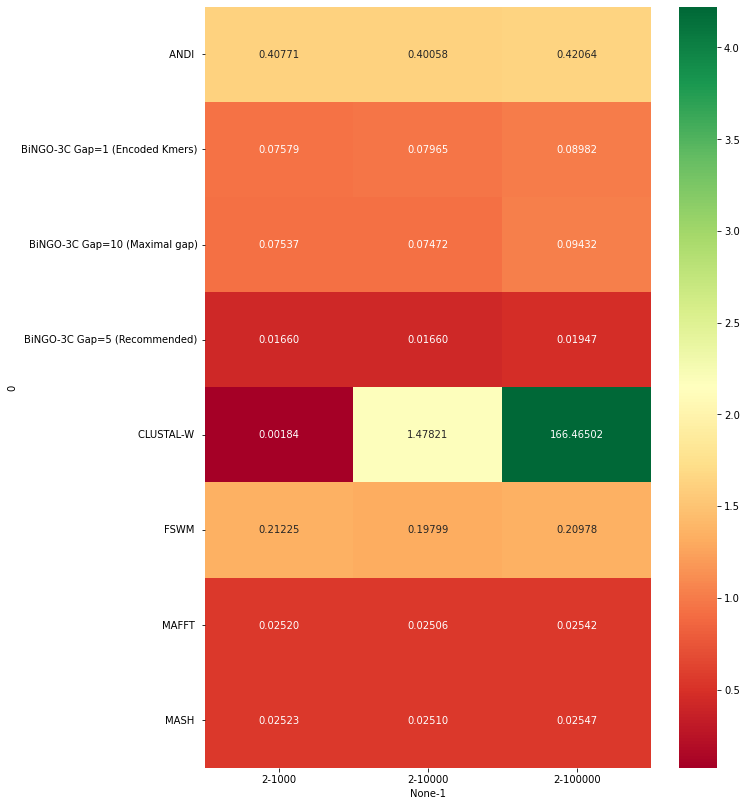

In [ ]:
benchmark = pd.DataFrame(Benchmarking)
benchmark[benchmark.iloc[:,2] > .5 ][2] = 0.5
benchmark
matrix = pd.pivot_table(data = benchmark, columns=[1],  index=[0])
matrix.droplevel(0, axis=1) 
matrix.droplevel(1, axis=1) 
colormap = sns.color_palette("vlag")

plt.figure(figsize=(10, 14))

sns.heatmap(np.log10((matrix)*100+1), annot=matrix, fmt='.5f', cmap='RdYlGn')


# R CODE

In [ ]:
bnch <- read.csv('/home/mounim/Projects/BiNGO-3C/notebooks/benchmark.csv')

library(ggplot2)
head(bnch)
ggplot(data=bnch, aes(x =Sequence_length, y =Processing_time, color=Method, fill=Method))+
  geom_point(size=.2)+
  geom_line(size=.2)+
  coord_cartesian(ylim = c(0.001, 0.5), xlim = c(0, 10000))+
  scale_y_log10()+
  theme_bw()+
  geom_smooth(alpha=.2)
